## Introduction
##### Liver is the largest internal organ and the largest gland in the human body. it is situated under the rib cage on right side of abdomen. Liver is essential for digesting food, it metabolizes nutrients, regulates blood sugar level and ridding the body of toxic substances. So it is important to take care of the liver health. Our work on Liver disease patient prediction using machine learning approaches helps to reduce the burden on doctors.

##### The dataset contains 416 liver patient records and 167 non liver patient records. The target column is a class label used to divide group into liver disease patient and no liver disease patient.

## Importing Libraries`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


## Data Collection

# Importing dataset


Since data is in form of csv file we have to use pandas read_csv to load the data

In [2]:
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
data.rename(columns={0:'Age_of_patient',1:'Gender',2:'Total Bilirubin',3:'Direct Bilirubin',4:'Alkaline Phosphotase',
                    5:'Alamine Aminotransferase',6:'Aspartate Aminotransferase',7:'Total Protiens',8:'Albumin',
                    9:'Albumin and Globulin Ratio',10:'Target'},inplace=True)

In [5]:
data.head()

,Age_of_patient,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
data.shape

(583, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_patient              583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   Alamine Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
data.duplicated().sum()

13

In [9]:
data.loc[data.duplicated()==True]

,Age_of_patient,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [10]:
data=data.drop_duplicates()

In [11]:
data.shape

(570, 11)

In [12]:
data.describe()

,Age_of_patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [13]:
data.describe(include='O')

,Gender
count,570
unique,2
top,Male
freq,430


In [14]:
data.isnull().sum()

Age_of_patient                0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    4
Target                        0
dtype: int64

##### ##The dataset contains 4 null values in A/G ratio coulumn

In [15]:
data.Target.value_counts()

1    406
2    164
Name: Target, dtype: int64

### Exploratory Data Analysis

In [16]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Univariate Analysis

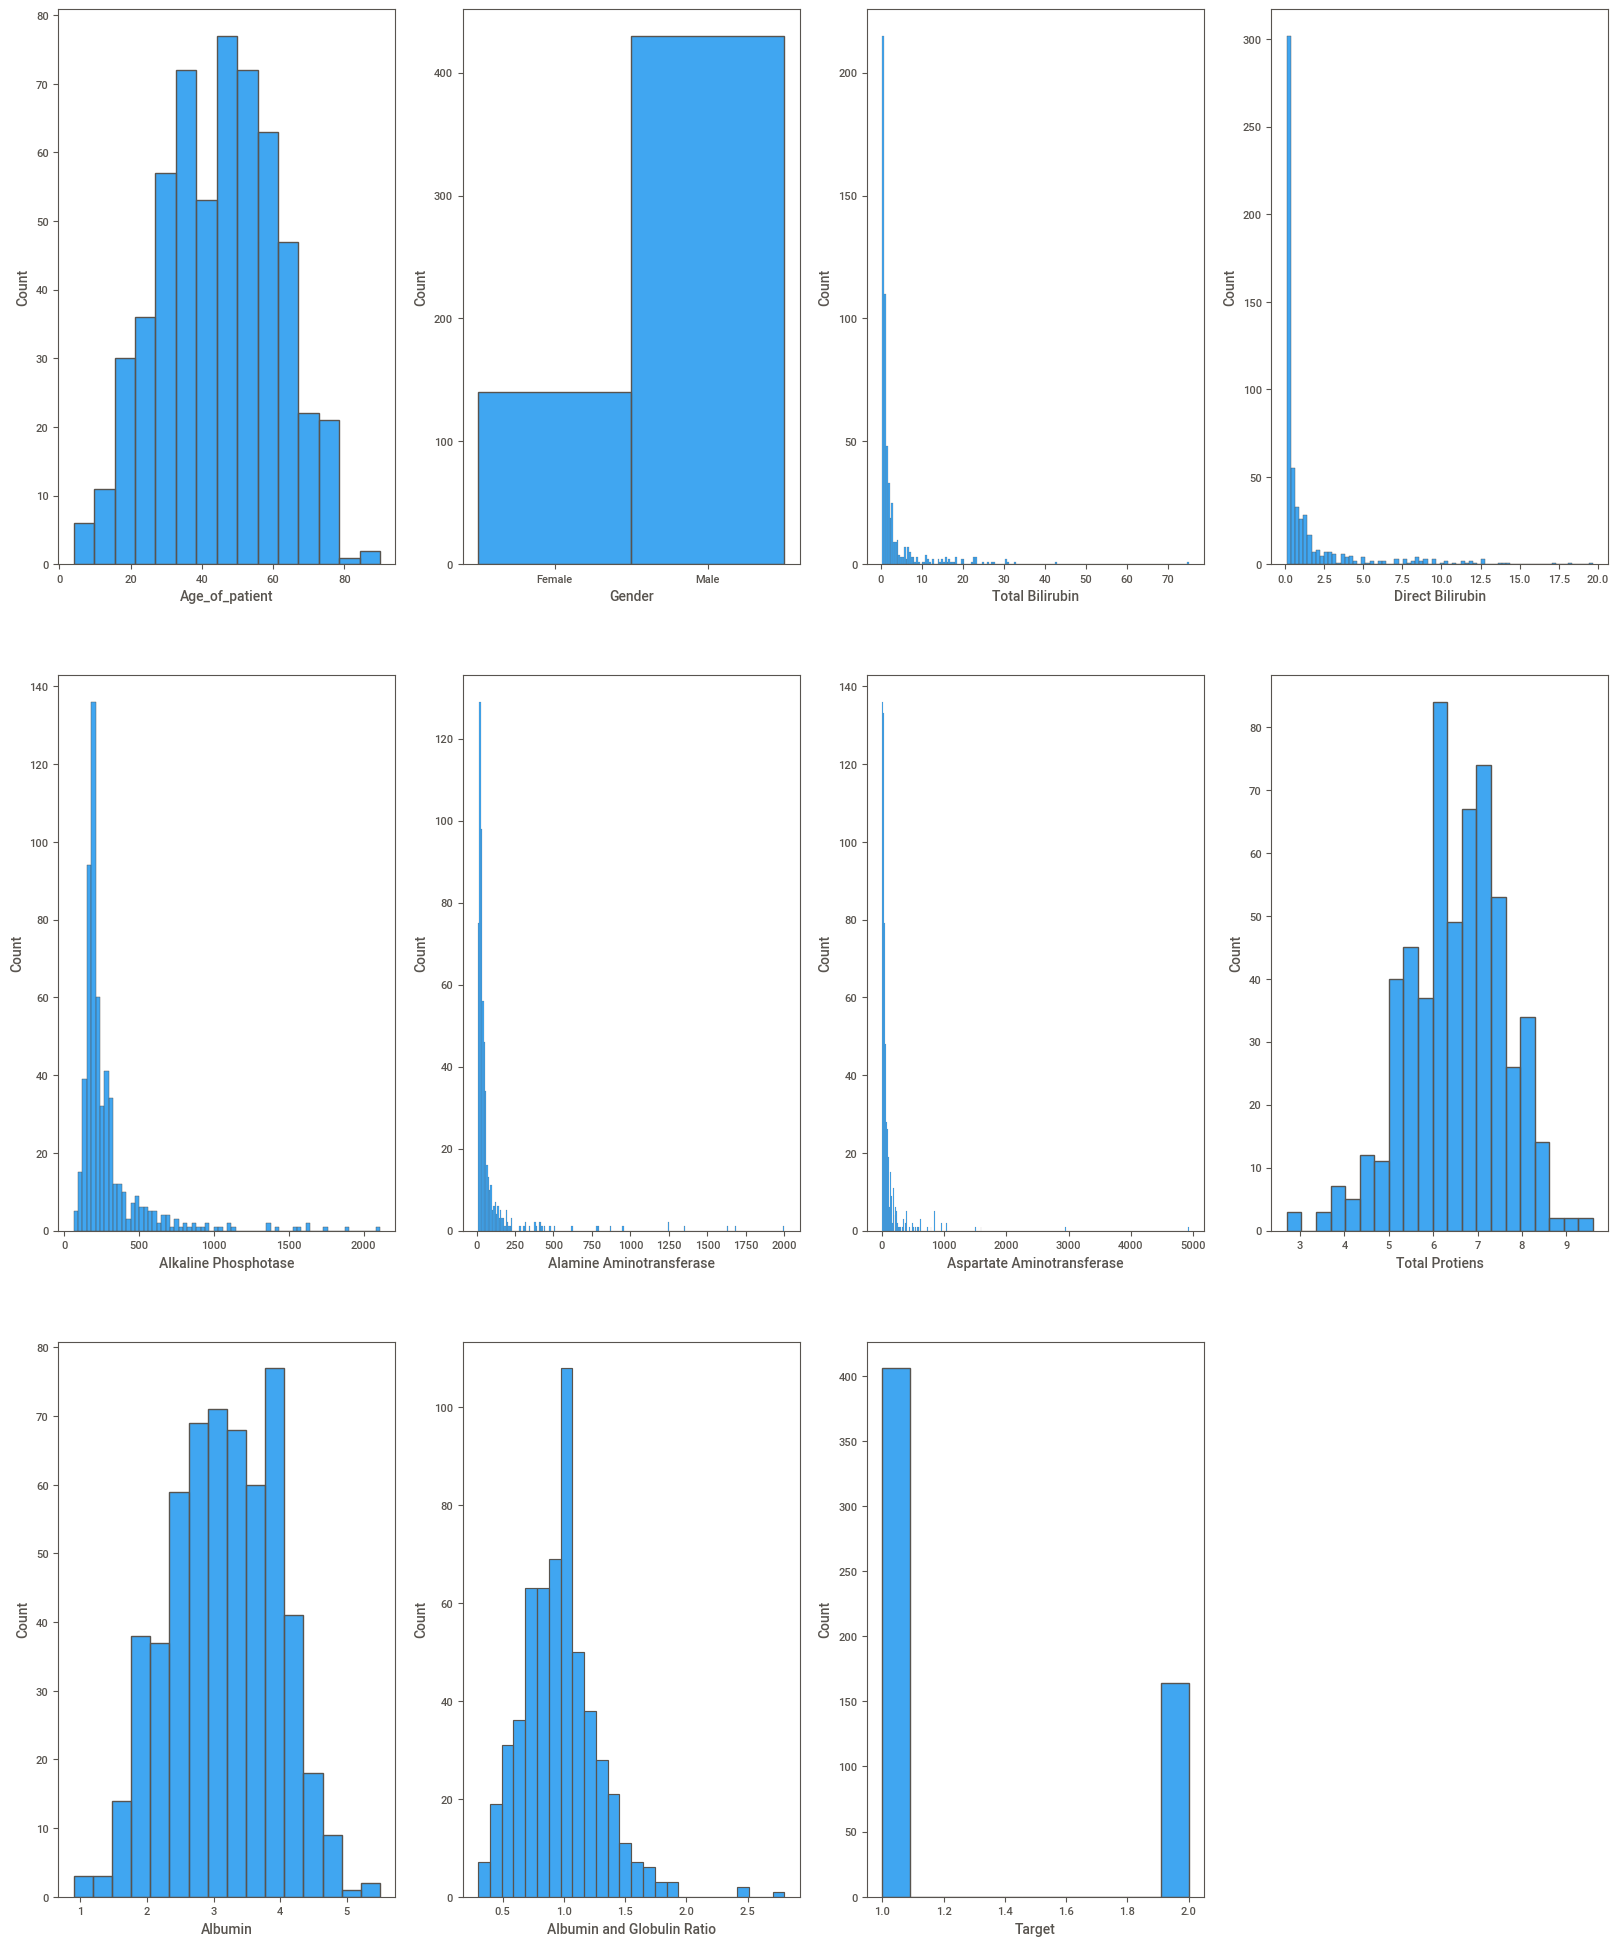

In [17]:
plt.figure(figsize=(20,25))
plotnumber=1

for i in data:
    plt.subplot(3,4,plotnumber)
    sns.histplot(x=i , data=data)
    plotnumber=plotnumber + 1

#### Insights from univariate analysis
###### 1.Age, ALP, total protien, albumin, A/G ratio are more or less normally distributed.
###### 2.Total bilirubin, direct bilirubin, ALT, AST are positively skewed.
###### 3.Gender is biased towards male.

## Feature Engineering

In [18]:
data.columns

Index(['Age_of_patient', 'Gender', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin and Globulin Ratio', 'Target'],
      dtype='object')

### Handling the missing values

In [19]:
## Lets go and see the percentage of missing values
#Check whether any null values are there or not
data.isnull().sum()

Age_of_patient                0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    4
Target                        0
dtype: int64

In [20]:
data.isnull().mean()

Age_of_patient                0.000000
Gender                        0.000000
Total Bilirubin               0.000000
Direct Bilirubin              0.000000
Alkaline Phosphotase          0.000000
Alamine Aminotransferase      0.000000
Aspartate Aminotransferase    0.000000
Total Protiens                0.000000
Albumin                       0.000000
Albumin and Globulin Ratio    0.007018
Target                        0.000000
dtype: float64

## Replacing null values with the median of the column

 To use mean,median,mode imputation-There is absolutely no relationship between data missing and any other values,observer or missing,within the dataset.

In [21]:


def impute_nan(df,variable,median):
#Filling NaN values with mean, median and mode using fillna() method
    df[variable+"_median"]=df[variable].fillna(median)

In [22]:
data=data.rename(columns = {'Albumin and Globulin Ratio':'Albumin_Globulin_Ratio'})


In [23]:
data.columns

Index(['Age_of_patient', 'Gender', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin_Globulin_Ratio', 'Target'],
      dtype='object')

In [24]:
median=data.Albumin_Globulin_Ratio.median()
median

0.95

In [25]:
impute_nan(data,'Albumin_Globulin_Ratio',median)
data.head().isnull().sum()

Age_of_patient                   0
Gender                           0
Total Bilirubin                  0
Direct Bilirubin                 0
Alkaline Phosphotase             0
Alamine Aminotransferase         0
Aspartate Aminotransferase       0
Total Protiens                   0
Albumin                          0
Albumin_Globulin_Ratio           0
Target                           0
Albumin_Globulin_Ratio_median    0
dtype: int64

In [26]:
print(data['Albumin_Globulin_Ratio'].std())
print(data['Albumin_Globulin_Ratio_median'].std())

0.3196354228293773
0.31850998617149995


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

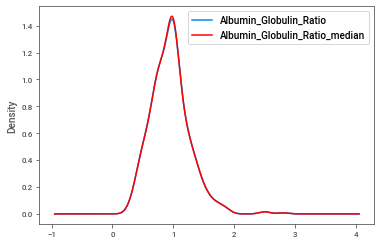

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Albumin_Globulin_Ratio'].plot(kind='kde', ax=ax)
data.Albumin_Globulin_Ratio_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Handling categorical data

In [29]:
data.Gender.value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

## Handling Categorical Data
#Nominal data --> data are not in any order --> OneHotEncoder is used in this case

In [3]:

data1=pd.get_dummies(data['Gender'],drop_first=True)

KeyError: 'Gender'

In [4]:
data=pd.concat([data1,data],axis=1)


NameError: name 'data1' is not defined

In [32]:
data.drop('Gender',axis=1,inplace=True)


In [33]:
data.columns

Index(['Male', 'Age_of_patient', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin_Globulin_Ratio', 'Target', 'Albumin_Globulin_Ratio_median'],
      dtype='object')

## Checking for outliers

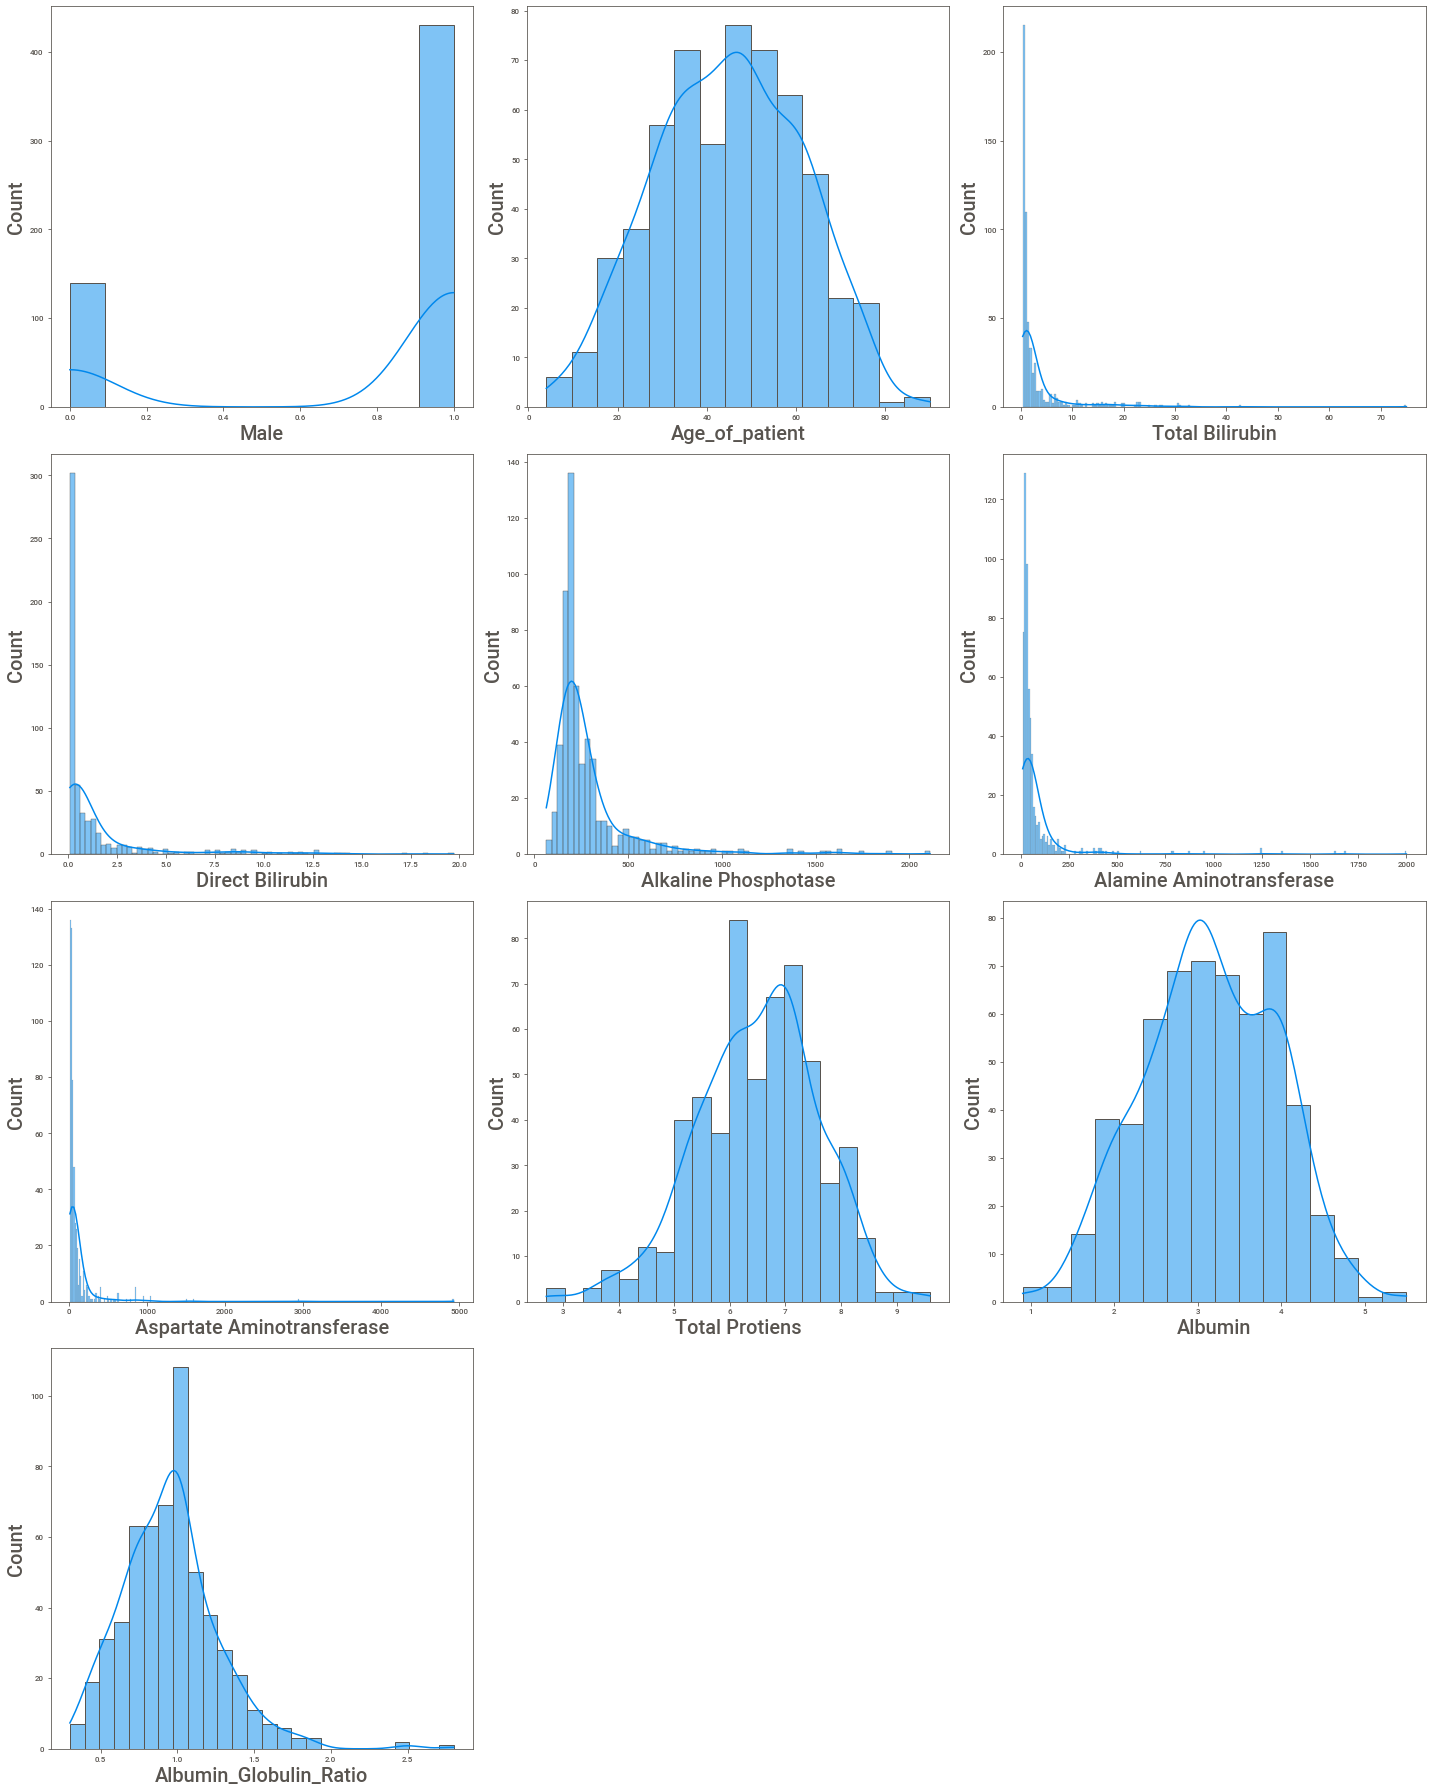

In [34]:
## let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

###### some column diagram shows like normal distribution-To use z score formula
###### some column diagram right skewed-inter quartile range formula


### 1.Age_of_patient

In [35]:
#If The Data Is Normally Distributed We use this
uppper_boundary=data['Age_of_patient'].mean() + 3* data['Age_of_patient'].std()
lower_boundary=data['Age_of_patient'].mean() - 3* data['Age_of_patient'].std()
print(lower_boundary), print(uppper_boundary),print(data['Age_of_patient'].mean())

-3.8774234605413156
93.57566907457641
44.849122807017544


(None, None, None)

### 2.Total Bilirubin

In [36]:
#### Lets compute the Interquantile range to calculate the boundaries
#If Features Are Skewed We Use the below Technique
IQR=data['Total Bilirubin'].quantile(0.75)-data['Total Bilirubin'].quantile(0.25)

In [37]:
lower_bridge=data['Total Bilirubin'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Total Bilirubin'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1.9000000000000001
5.300000000000001


(None, None)

In [38]:
data.loc[data['Total Bilirubin']>upper_bridge]

,Male,Age_of_patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin_Globulin_Ratio,Target,Albumin_Globulin_Ratio_median
1,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0.74
2,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0.89
22,1,62,6.8,3.0,542,116,66,6.4,3.1,0.90,1,0.90
27,1,34,6.2,3.0,240,1680,850,7.2,4.0,1.20,1,1.20
37,0,46,14.2,7.8,374,38,77,4.3,2.0,0.80,1,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...
572,1,32,15.6,9.5,134,54,125,5.6,4.0,2.50,1,2.50
574,1,32,12.1,6.0,515,48,92,6.6,2.4,0.50,1,0.50
575,1,32,25.0,13.7,560,41,88,7.9,2.5,2.50,1,2.50
576,1,32,15.0,8.2,289,58,80,5.3,2.2,0.70,1,0.70


### 3.Direct Bilirubin

In [39]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data['Direct Bilirubin'].quantile(0.75)-data['Direct Bilirubin'].quantile(0.25)

In [40]:
lower_bridge=data['Direct Bilirubin'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Direct Bilirubin'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1.4500000000000002
2.95


(None, None)

In [41]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data['Alkaline Phosphotase'].quantile(0.75)-data['Alkaline Phosphotase'].quantile(0.25)

In [42]:
lower_bridge=data['Alkaline Phosphotase'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Alkaline Phosphotase'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-7.0
481.0


(None, None)

In [43]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data['Alamine Aminotransferase'].quantile(0.75)-data['Alamine Aminotransferase'].quantile(0.25)

In [44]:
lower_bridge=data['Alamine Aminotransferase'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Alamine Aminotransferase'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-32.5
115.5


(None, None)

In [45]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data['Aspartate Aminotransferase'].quantile(0.75)-data['Aspartate Aminotransferase'].quantile(0.25)

In [46]:
lower_bridge=data['Aspartate Aminotransferase'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Aspartate Aminotransferase'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-67.625
179.375


(None, None)

In [47]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
#If The Data Is Normally Distributed We use this
uppper_boundary=data['Total Protiens'].mean() + 3* data['Total Protiens'].std()
lower_boundary=data['Total Protiens'].mean() - 3* data['Total Protiens'].std()
print(lower_boundary), print(uppper_boundary),print(data['Total Protiens'].mean())

3.2314147412227516
9.761216837724618
6.496315789473685


(None, None, None)

In [48]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
#If The Data Is Normally Distributed We use this

uppper_boundary=data['Albumin'].mean() + 3* data['Albumin'].std()
lower_boundary=data['Albumin'].mean() - 3* data['Albumin'].std()
print(lower_boundary), print(uppper_boundary),print(data['Albumin'].mean())

0.758508256246285
5.539386480595821
3.148947368421053


(None, None, None)

In [49]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
#If The Data Is Normally Distributed We use this

uppper_boundary=data['Albumin_Globulin_Ratio_median'].mean() + 3* data['Albumin_Globulin_Ratio_median'].std()
lower_boundary=data['Albumin_Globulin_Ratio_median'].mean() - 3* data['Albumin_Globulin_Ratio_median'].std()
print(lower_boundary), print(uppper_boundary),print(data['Albumin_Globulin_Ratio_median'].mean())

-0.007512414654850863
1.9035475023741488
0.948017543859649


(None, None, None)

In [50]:
data1=data.copy()

In [51]:
data.columns

Index(['Male', 'Age_of_patient', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin_Globulin_Ratio', 'Target', 'Albumin_Globulin_Ratio_median'],
      dtype='object')

In [52]:
data1.loc[data1['Age_of_patient']>=93,'Age_of_patient']=93
data1.loc[data1['Total Bilirubin']>=5.3,'Total Bilirubin']=5.3
data1.loc[data1['Alkaline Phosphotase']>=481.75,'Alkaline Phosphotase']=481.75
data1.loc[data1['Direct Bilirubin']>=4.0,'Direct Bilirubin']=4.0
data1.loc[data1['Alamine Aminotransferase']>=115.5,'Alamine Aminotransferase']=115
data1.loc[data1['Aspartate Aminotransferase']>=179,'Aspartate Aminotransferase']=179
data1.loc[data1['Total Protiens']>=9.7,'Total Protiens']=9.7
data1.loc[data1['Total Protiens']<=3.2,'Total Protiens']=3.2
data1.loc[data1['Albumin']>=5.5,'Albumin']=5.5
data1.loc[data1['Albumin']<=0.7,'Albumin']=0.7
data1.loc[data1['Albumin_Globulin_Ratio_median']>=1,'Albumin_Globulin_Ratio_median']=1


### Statistical representation of data before removing outliers.

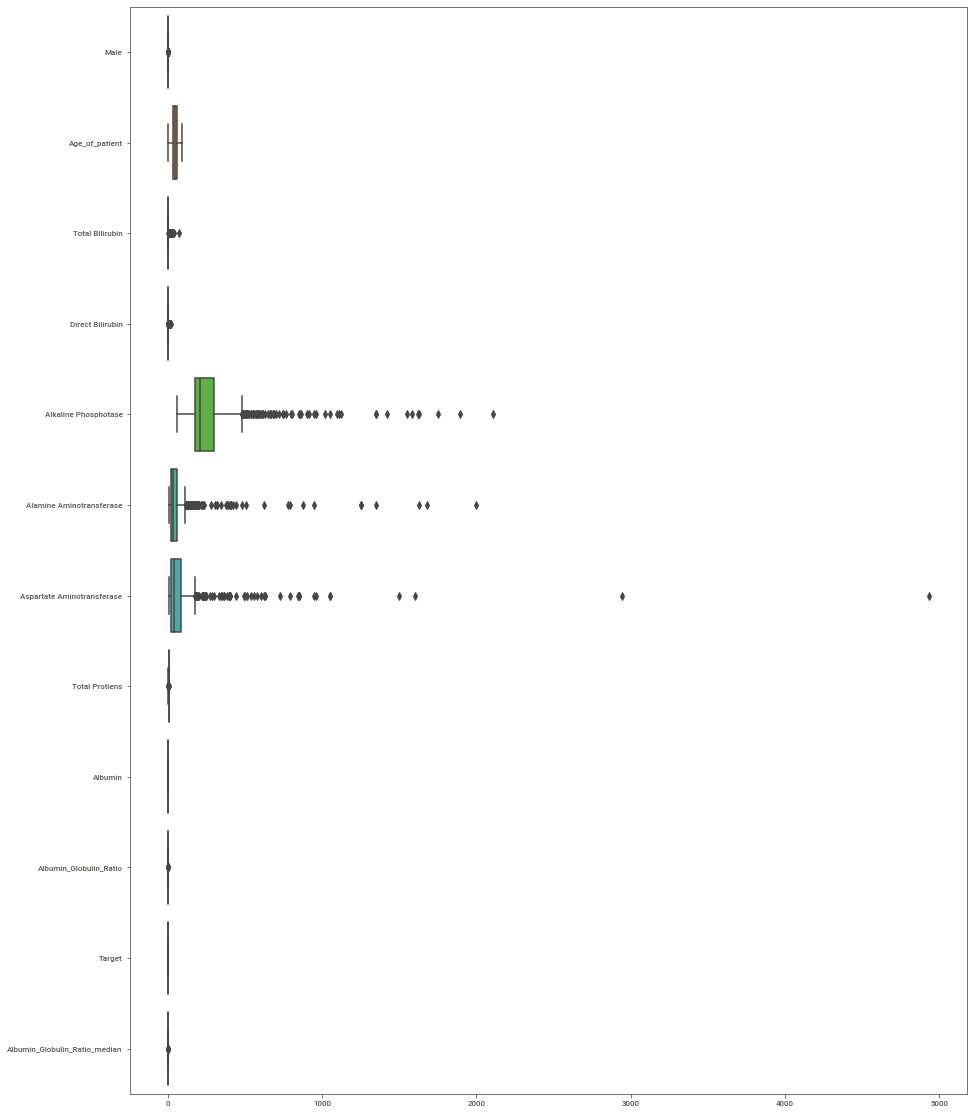

In [53]:
fig ,ax  = plt.subplots(figsize = (15,20))
sns.boxplot(data = data , ax = ax,orient='h')

In [181]:
data.head()

,Male,Age_of_patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin_Globulin_Ratio,Target,Albumin_Globulin_Ratio_median
0,0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0.90
1,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0.74
2,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0.89
3,1,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1.00
4,1,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0.40


### Statistical representation of data after removing outliers.

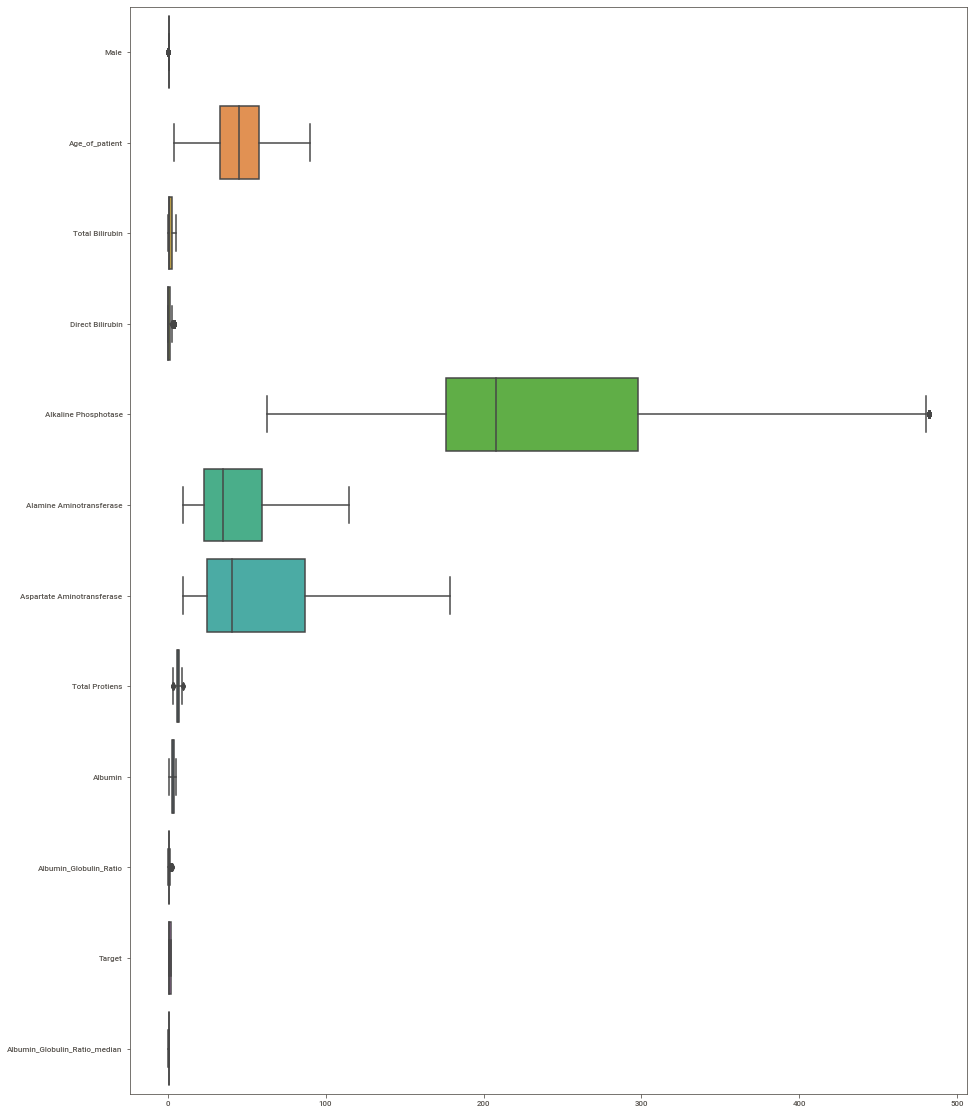

In [54]:
fig ,ax  = plt.subplots(figsize = (15,20))
sns.boxplot(data = data1 , ax = ax,orient='h')

### Feature selection

In [183]:
data1.corr()

,Male,Age_of_patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin_Globulin_Ratio,Target,Albumin_Globulin_Ratio_median
Male,1.000000,0.058237,0.178653,0.161503,0.052968,0.160691,0.164782,-0.085372,-0.091369,-0.005611,-0.078501,-0.042187
Age_of_patient,0.058237,1.000000,0.102560,0.084035,0.042275,-0.064569,-0.027094,-0.196831,-0.271170,-0.215967,-0.138093,-0.244166
Total Bilirubin,0.178653,0.102560,1.000000,0.963569,0.362891,0.446811,0.540683,-0.070600,-0.305188,-0.278453,-0.320651,-0.401670
Direct Bilirubin,0.161503,0.084035,0.963569,1.000000,0.365158,0.420040,0.526415,-0.048259,-0.288908,-0.268203,-0.311795,-0.393987
Alkaline Phosphotase,0.052968,0.042275,0.362891,0.365158,1.000000,0.380324,0.301938,0.009196,-0.173848,-0.281590,-0.241427,-0.301247
Alamine Aminotransferase,0.160691,-0.064569,0.446811,0.420040,0.380324,1.000000,0.782423,0.015647,-0.034662,-0.079335,-0.287789,-0.075368
Aspartate Aminotransferase,0.164782,-0.027094,0.540683,0.526415,0.301938,0.782423,1.000000,-0.032443,-0.160192,-0.136462,-0.297159,-0.218972
Total Protiens,-0.085372,-0.196831,-0.070600,-0.048259,0.009196,0.015647,-0.032443,1.000000,0.785028,0.235566,0.036878,0.278064
Albumin,-0.091369,-0.271170,-0.305188,-0.288908,-0.173848,-0.034662,-0.160192,0.785028,1.000000,0.687438,0.166835,0.734764
Albumin_Globulin_Ratio,-0.005611,-0.215967,-0.278453,-0.268203,-0.281590,-0.079335,-0.136462,0.235566,0.687438,1.000000,0.171402,0.811023


In [184]:
data1.drop('Target',axis=1).corr()

,Male,Age_of_patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin_Globulin_Ratio,Albumin_Globulin_Ratio_median
Male,1.000000,0.058237,0.178653,0.161503,0.052968,0.160691,0.164782,-0.085372,-0.091369,-0.005611,-0.042187
Age_of_patient,0.058237,1.000000,0.102560,0.084035,0.042275,-0.064569,-0.027094,-0.196831,-0.271170,-0.215967,-0.244166
Total Bilirubin,0.178653,0.102560,1.000000,0.963569,0.362891,0.446811,0.540683,-0.070600,-0.305188,-0.278453,-0.401670
Direct Bilirubin,0.161503,0.084035,0.963569,1.000000,0.365158,0.420040,0.526415,-0.048259,-0.288908,-0.268203,-0.393987
Alkaline Phosphotase,0.052968,0.042275,0.362891,0.365158,1.000000,0.380324,0.301938,0.009196,-0.173848,-0.281590,-0.301247
Alamine Aminotransferase,0.160691,-0.064569,0.446811,0.420040,0.380324,1.000000,0.782423,0.015647,-0.034662,-0.079335,-0.075368
Aspartate Aminotransferase,0.164782,-0.027094,0.540683,0.526415,0.301938,0.782423,1.000000,-0.032443,-0.160192,-0.136462,-0.218972
Total Protiens,-0.085372,-0.196831,-0.070600,-0.048259,0.009196,0.015647,-0.032443,1.000000,0.785028,0.235566,0.278064
Albumin,-0.091369,-0.271170,-0.305188,-0.288908,-0.173848,-0.034662,-0.160192,0.785028,1.000000,0.687438,0.734764
Albumin_Globulin_Ratio,-0.005611,-0.215967,-0.278453,-0.268203,-0.281590,-0.079335,-0.136462,0.235566,0.687438,1.000000,0.811023


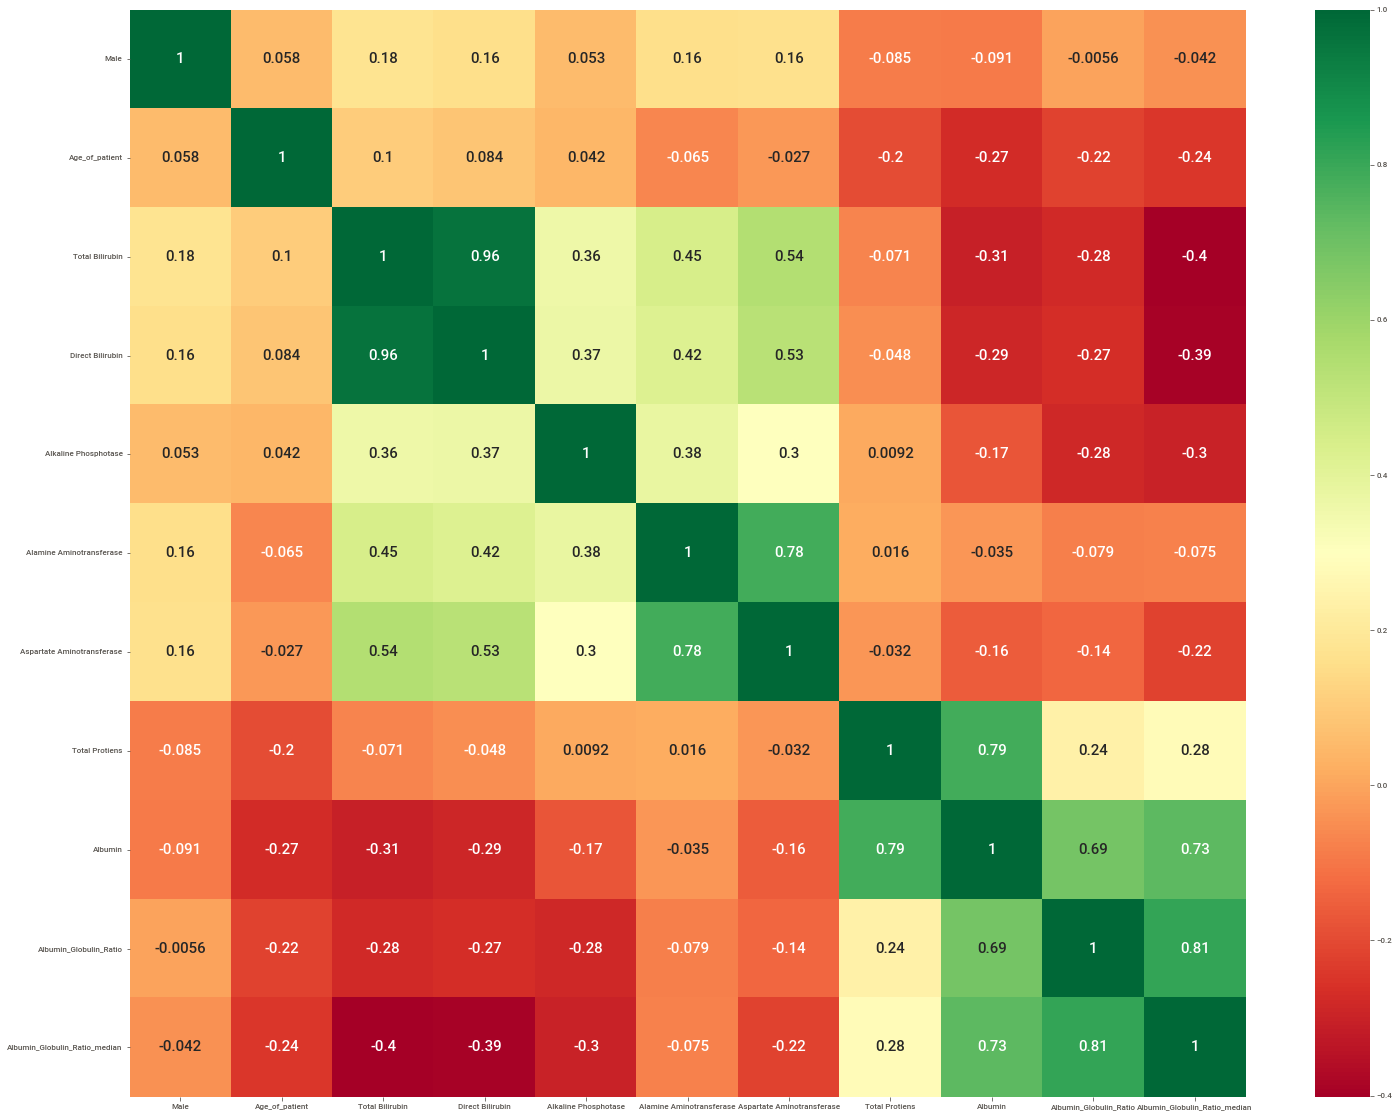

In [185]:
plt.figure(figsize=(25,20))
sns.heatmap(data1.drop('Target',axis=1).corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})

# We will create models :
Based on the statistical test, we will drop the following features : direct bilurbin


In [186]:
data1.drop('Direct Bilirubin',axis=1,inplace=True)

In [187]:
data1

,Male,Age_of_patient,Total Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin_Globulin_Ratio,Target,Albumin_Globulin_Ratio_median
0,0,65,0.7,187.00,16,18,6.8,3.3,0.90,1,0.90
1,1,62,5.3,481.75,64,100,7.5,3.2,0.74,1,0.74
2,1,62,5.3,481.75,60,68,7.0,3.3,0.89,1,0.89
3,1,58,1.0,182.00,14,20,6.8,3.4,1.00,1,1.00
4,1,72,3.9,195.00,27,59,7.3,2.4,0.40,1,0.40
...,...,...,...,...,...,...,...,...,...,...,...
578,1,60,0.5,481.75,20,34,5.9,1.6,0.37,2,0.37
579,1,40,0.6,98.00,35,31,6.0,3.2,1.10,1,1.00
580,1,52,0.8,245.00,48,49,6.4,3.2,1.00,1,1.00
581,1,31,1.3,184.00,29,32,6.8,3.4,1.00,1,1.00


In [188]:
data1.columns

Index(['Male', 'Age_of_patient', 'Total Bilirubin', 'Alkaline Phosphotase',
       'Alamine Aminotransferase', 'Aspartate Aminotransferase',
       'Total Protiens', 'Albumin', 'Albumin_Globulin_Ratio', 'Target',
       'Albumin_Globulin_Ratio_median'],
      dtype='object')

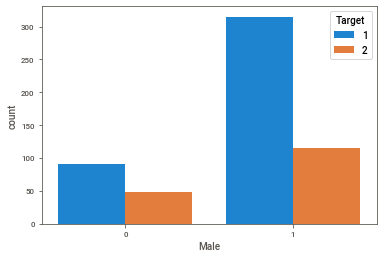

In [189]:
sns.countplot(x= data1['Male'] , hue='Target' ,data=data1)

## Model Creation

In [190]:
data1.head()

,Male,Age_of_patient,Total Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin_Globulin_Ratio,Target,Albumin_Globulin_Ratio_median
0,0,65,0.7,187.00,16,18,6.8,3.3,0.90,1,0.90
1,1,62,5.3,481.75,64,100,7.5,3.2,0.74,1,0.74
2,1,62,5.3,481.75,60,68,7.0,3.3,0.89,1,0.89
3,1,58,1.0,182.00,14,20,6.8,3.4,1.00,1,1.00
4,1,72,3.9,195.00,27,59,7.3,2.4,0.40,1,0.40


In [191]:
data1.columns

Index(['Male', 'Age_of_patient', 'Total Bilirubin', 'Alkaline Phosphotase',
       'Alamine Aminotransferase', 'Aspartate Aminotransferase',
       'Total Protiens', 'Albumin', 'Albumin_Globulin_Ratio', 'Target',
       'Albumin_Globulin_Ratio_median'],
      dtype='object')

#### Splitting of Data

In [192]:
X = data1.drop(columns = ['Target','Albumin_Globulin_Ratio'])
y = data1['Target']


### Use Random over sampling method to handle imbalanced dataset

In [193]:

from imblearn.over_sampling import RandomOverSampler

In [194]:
os =  RandomOverSampler()

In [195]:
X_res, y_res = os.fit_resample(X,y)

In [196]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 406, 2: 164})
Resampled dataset shape Counter({1: 406, 2: 406})


### Feature Scaling

In [197]:
from sklearn.preprocessing import StandardScaler
# we need to scale our data as well
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_res)
x_scaled= scaler.transform(X_res)
# This is how our data looks now after scaling.
x_scaled

array([[-1.62018517,  1.28289567, -0.64835194, ...,  0.27560214,
         0.1305887 ,  0.18954498],
       [ 0.6172134 ,  1.10025679,  2.39210525, ...,  0.92995576,
         0.00627683, -0.7228553 ],
       [ 0.6172134 ,  1.10025679,  2.39210525, ...,  0.46256032,
         0.1305887 ,  0.13251996],
       ...,
       [ 0.6172134 , -0.9696505 , -0.71444883, ...,  0.46256032,
         0.37921245,  0.75979515],
       [-1.62018517, -0.11733573, -0.51615815, ...,  1.86474665,
         1.4980193 ,  0.75979515],
       [-1.62018517, -1.63932639, -0.78054573, ...,  0.55603941,
         1.62233117,  0.75979515]])

In [198]:
x_scaled

array([[-1.62018517,  1.28289567, -0.64835194, ...,  0.27560214,
         0.1305887 ,  0.18954498],
       [ 0.6172134 ,  1.10025679,  2.39210525, ...,  0.92995576,
         0.00627683, -0.7228553 ],
       [ 0.6172134 ,  1.10025679,  2.39210525, ...,  0.46256032,
         0.1305887 ,  0.13251996],
       ...,
       [ 0.6172134 , -0.9696505 , -0.71444883, ...,  0.46256032,
         0.37921245,  0.75979515],
       [-1.62018517, -0.11733573, -0.51615815, ...,  1.86474665,
         1.4980193 ,  0.75979515],
       [-1.62018517, -1.63932639, -0.78054573, ...,  0.55603941,
         1.62233117,  0.75979515]])

### Splitting the test train data

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y_res,test_size=0.2,random_state=0)

### Use of Machine Learning Models

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier

In [201]:
logreg = LogisticRegression(random_state=42)
clf =logreg.fit(X_train,y_train)

In [202]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2'],'max_iter':[20,40,60],'solver':['liblinear','newton-cg','saga'],'C':[0.001,0.00001,1,100,1000]}]
grid_search = GridSearchCV(estimator = logreg,param_grid = parameters,scoring = 'accuracy',
                           cv = 10,)
grid_search = grid_search.fit(X_train, y_train)

In [203]:
grid_search.best_params_

{'C': 1, 'max_iter': 20, 'penalty': 'l2', 'solver': 'liblinear'}

In [204]:
logreg = LogisticRegression( random_state=0,C=1, penalty='l2',max_iter=20
                            ,solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=20, random_state=0, solver='liblinear')

In [205]:
knn=KNeighborsClassifier(n_neighbors = 6 , metric ='minkowski' ,p =2)
model=knn.fit(X_train , y_train)

In [206]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors':[5,10,10,100],'leaf_size':[5,10,15,20,25,30],'p':[1,2,3]}]
grid_search = GridSearchCV(estimator = knn,param_grid = parameters,scoring = 'accuracy',
                           cv = 10,)
grid_search = grid_search.fit(X_train, y_train)

In [207]:
grid_search.best_params_

{'leaf_size': 5, 'n_neighbors': 5, 'p': 3}

In [208]:
knn=KNeighborsClassifier(n_neighbors = 5 , metric ='minkowski' ,p =3,leaf_size=5)
model=knn.fit(X_train , y_train)

In [209]:
from sklearn.svm import SVC
SVM_Classifier= SVC(kernel = 'linear' , random_state=42)
SVM_Classifier.fit(X_train , y_train)

SVC(kernel='linear', random_state=42)

In [210]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = SVM_Classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [211]:
grid_search.best_params_


{'C': 10, 'gamma': 0.8, 'kernel': 'rbf'}

In [212]:
from sklearn.svm import SVC
SVM_Classifier= SVC(kernel = 'rbf' , random_state=42)
SVM_Classifier.fit(X_train , y_train)

SVC(random_state=42)

In [213]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train , y_train)

GaussianNB()

In [214]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion= 'entropy',random_state=42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [215]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}


In [216]:
cv=GridSearchCV( dectree,param_grid=parameter,cv=5,scoring='accuracy')
grid_search = cv.fit(X_train, y_train)

In [217]:
cv.best_params_


{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [218]:
dectree = DecisionTreeClassifier(criterion= 'entropy',max_depth=5,max_features='auto',splitter='best',random_state=42)


In [219]:
dectree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       random_state=42)

In [220]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train , y_train)

RandomForestClassifier()

In [221]:
from sklearn.model_selection import RandomizedSearchCV


In [222]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(X) for X in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(X) for X in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [223]:
# Create the random grid
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



In [224]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = ranfor, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [225]:
rf_random=rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [226]:
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [227]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)
ranfor.fit(X_train , y_train)

RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=1000)

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

In [229]:
classifier = GradientBoostingClassifier(n_estimators=10,learning_rate=0.5)


classifier.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=10)

In [230]:
from sklearn.model_selection import GridSearchCV
parameters = [{'learning_rate': [0.01,0.05,0.1,1,0.5],'max_depth':[1,3,5,7,9],
              'n_estimators': [5,10,15,20]}]
grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'accuracy',
                           cv = 10,)
grid_search = grid_search.fit(X_train, y_train)

In [104]:
grid_search.best_params_

{'learning_rate': 1, 'max_depth': 7, 'n_estimators': 15}

In [231]:
classifier = GradientBoostingClassifier(n_estimators=15,learning_rate=1,max_depth=7)


classifier.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=7, n_estimators=15)

In [232]:
y_pred_logreg = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc =SVM_Classifier.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_dectree = dectree.predict(X_test)
y_pred_ranfor = ranfor.predict(X_test)
y_pred_Gradient=classifier.predict(X_test)


## Model Evaluation and choose the best model

In [233]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score
accuracy_logreg = accuracy_score(y_test , y_pred_logreg)
precision_logreg = precision_score(y_test,y_pred_logreg)
recall_logreg = recall_score(y_test,y_pred_logreg)
f1_logreg = f1_score(y_test,y_pred_logreg)

In [234]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)
precision_knn = precision_score(y_test,y_pred_knn)
recall_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)

In [235]:
accuracy_svc = accuracy_score(y_test,y_pred_svc)
precision_svc = precision_score(y_test,y_pred_svc)
recall_svc = recall_score(y_test,y_pred_svc)
f1_svc = f1_score(y_test,y_pred_svc)

In [236]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)
precision_nb= precision_score(y_test,y_pred_nb)
recall_nb = recall_score(y_test,y_pred_nb)
f1_nb = f1_score(y_test,y_pred_nb)

In [237]:
accuracy_dectree= accuracy_score(y_test,y_pred_dectree)
precision_dectree = precision_score(y_test,y_pred_dectree)
recall_dectree = recall_score(y_test,y_pred_dectree)
f1_dectree = f1_score(y_test,y_pred_dectree)

In [238]:
accuracy_ranfor = accuracy_score(y_test,y_pred_ranfor)
precision_ranfor = precision_score(y_test,y_pred_ranfor)
recall_ranfor = recall_score(y_test,y_pred_ranfor)
f1_ranfor = f1_score(y_test,y_pred_ranfor)

In [239]:
accuracy_Gradient= accuracy_score(y_test,y_pred_Gradient)
precision_Gradient = precision_score(y_test,y_pred_Gradient)
recall_Gradient = recall_score(y_test,y_pred_Gradient)
f1_Gradient = f1_score(y_test,y_pred_Gradient)

In [240]:
from xgboost import XGBClassifier


In [241]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [242]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [243]:
XGB_Classifier= XGBClassifier(objective='binary:logistic')
XGB_Classifier.fit(X_train,y_train)

XGBClassifier()

In [244]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
random_search=RandomizedSearchCV(XGB_Classifier,param_distributions=params,n_iter=5)

In [245]:
random_search=random_search.fit(X_train,y_train)


In [246]:
random_search.best_params_


{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [247]:
XGB_Classifier = XGBClassifier(objective='binary:logistic',max_depth=5,learning_rate=0.3,gamma=0.4,min_child_weight=1,colsample_bytree=0.4)
XGB_Classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=5)

In [248]:
y_pred_XGB=XGB_Classifier.predict(X_test)

In [249]:
accuracy_XGB= accuracy_score(y_test,y_pred_XGB)
precision_XGB= precision_score(y_test,y_pred_XGB)
recall_XGB = recall_score(y_test,y_pred_XGB)
f1_XGB = f1_score(y_test,y_pred_XGB)

In [250]:
oooModel_compare = pd.DataFrame({'Logistic Regression':[accuracy_logreg,precision_logreg,recall_logreg,f1_logreg],
                             'Naive Bayes': [accuracy_nb,precision_nb,recall_nb,f1_nb],
                             'KNN':[accuracy_knn,precision_knn,recall_knn,f1_knn],
                             'Support Vector Machine':[accuracy_svc,precision_svc,recall_svc,f1_svc],
                             'Random Forest Classifier':[accuracy_ranfor,precision_ranfor,recall_ranfor,f1_ranfor],
                             'Decision Tree Classifier':[accuracy_dectree,precision_dectree,recall_dectree,f1_dectree],
                   ooo           'Gradient Boosting Classifier':[accuracy_Gradient,precision_Gradient,recall_Gradient,f1_Gradient],
                             'XG Boosting Classifier':[accuracy_XGB,precision_XGB,recall_XGB,f1_XGB]

                             },index = ['Accuracy','Precision','Recall','f1 score'])

In [251]:
Model_compare

,Logistic Regression,Naive Bayes,KNN,Support Vector Machine,Random Forest Classifier,Decision Tree Classifier,Gradient Boosting Classifier,XG Boosting Classifier
Accuracy,0.730061,0.717791,0.736196,0.711656,0.834356,0.779141,0.858896,0.852761
Precision,0.722222,0.689655,0.704918,0.705882,0.872727,0.847826,0.846154,0.838095
Recall,0.573529,0.588235,0.632353,0.529412,0.705882,0.573529,0.808824,0.926316
f1 score,0.639344,0.634921,0.666667,0.605042,0.780488,0.684211,0.827068,0.880000


### Result:

From these results it is found that Dataset shows better results and Gradient Boosting Classifier,XG Boosting Classifier is the best model.

### Challanges faced on the Data

#### Handling null values to filling NaN values with median using fillna() method.
#### Handling Categorical data of gender by converting into numerical data using Onehot Encoding Method.
#### Removing Outliers using this methods
*some column diagram shows like normal distribution-To use z score formula. 

*some column diagram right skewed-inter quartile range formula.
#### Based on the statistical test(Correlation), we will drop the feature : direct bilurbin.
#### Scaling the data using standard scaler method.
#### Handling Imbalanced data using the random sampling Technique.
#### Hyperparameter was used to find the Best Parameter.